# <p style="background-color:yellow; font-family:newtimeroman; font-size:150%; text-align:center">Objective</p>

To determine the type of Emotion in text data.

## <p style="background-color:yellow; font-family:newtimeroman; font-size:150%; text-align:center">Introduction</p>

Emotion Analysis aims to detect and recognize types of feelings through the expression of texts, such as anger, disgust, fear, happiness, sadness, and surprise.

![emotions](https://s01.sgp1.cdn.digitaloceanspaces.com/article/107360-byxhzxvmlb-1544009839.jpg)


## <p style="background-color:yellow; font-family:newtimeroman; font-size:150%; text-align:center">About Dataset</p>

This dataset contains emotions expressed through text and the emotions included in the data are ["happy","sadness","anger","fear","love","surprise"].

The csv file consist of text descriptions and its corresponding label.

## <p style="background-color:yellow; font-family:newtimeroman; font-size:150%; text-align:center">Problem Statement</p> 

Since it deals with the text and we are classifying the text into respective emotions(labels) this is clearly a NLP text classfication problem. We have multiple emotions(labels) in our dataset hence it is a multi-classification problem.


## <p style="background-color:yellow; font-family:newtimeroman; font-size:150%; text-align:center">Methodology/Approach</p>

In this project we will do following processes:-

1.Exploratory Data Analysis

2.Text Cleaning and KeyWord Extraction

3.Model Building and Evaluation
 
4.Frontend(App via Streamlit to show predictions)

In [23]:
## Import Basic Libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [24]:
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
from textblob import TextBlob
from textblob import Word
import nltk
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud

In [25]:
## Read Dataset
df = pd.read_csv(r'D:\Excel files\emotion dataset3\Emotion_final.csv').sample(15000,random_state=10)

In [26]:
## Previewing the dataset
df.head()

,Text,Emotion
9730,ive come up with essentially tracks momentum g...,happy
16452,ive been feeling incredibly inadequate more so...,sadness
331,i just love the feeling of something warmly hu...,happy
2333,is only friend made yuuki feel special,happy
10381,i feel like as a generation of men as a family...,sadness


### <p style="background-color:yellow; font-family:newtimeroman; font-size:150%; text-align:left">1.Exploratory Data Analysis</p>

In [27]:
## Shape of Dataset
df.shape

(15000, 2)

In [28]:
## Null Values
df.isna().sum()

Text       0
Emotion    0
dtype: int64

We have no null values in our dataset

In [29]:
## Value Counts of Emotion types
df['Emotion'].value_counts()

happy       4880
sadness     4384
anger       2093
fear        1873
love        1169
surprise     601
Name: Emotion, dtype: int64

"Happy" emotion has highest Value counts

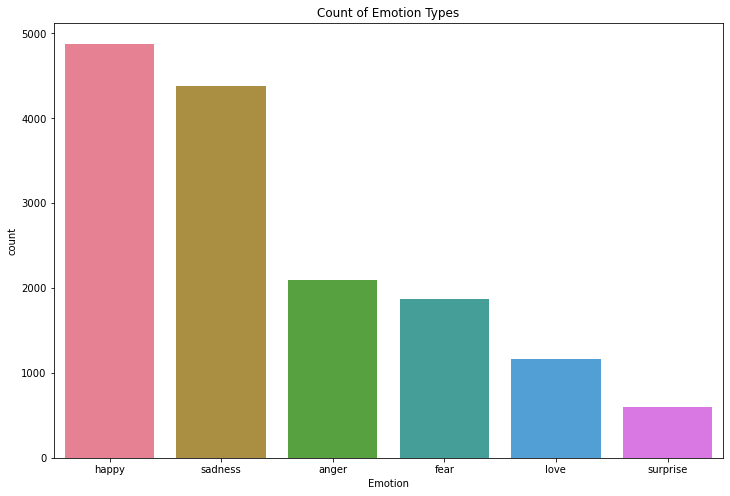

In [30]:
## Visual Representation of Value counts of Different Emotion
plt.figure(figsize=(12,8))
sns.countplot(df['Emotion'],palette='husl')
plt.title("Count of Emotion Types");

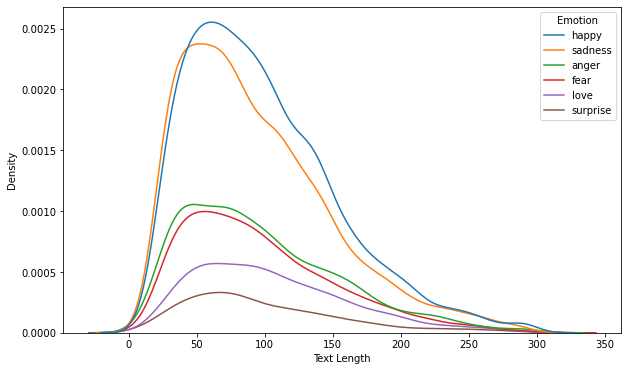

In [31]:
## Text Length
df["Text Length"]=df["Text"].apply(len)

fig=plt.figure(figsize=(10,6))

sns.kdeplot(
    x=df["Text Length"],
    hue=df["Emotion"]
)
plt.show()

In [32]:
df['Text Length'].describe()

count    15000.000000
mean        97.223800
std         55.420268
min          7.000000
25%         54.000000
50%         87.000000
75%        130.000000
max        307.000000
Name: Text Length, dtype: float64

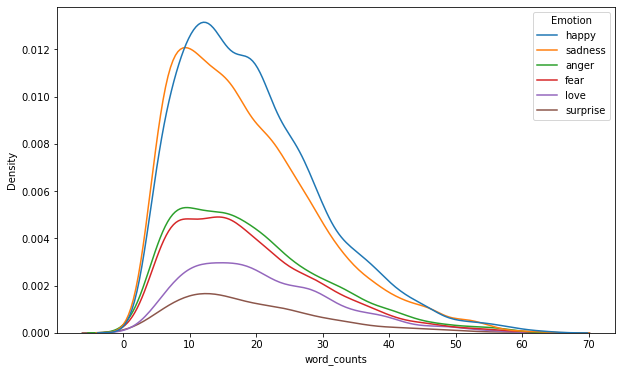

In [33]:
## Word Counts
df['word_counts'] = df['Text'].apply(lambda x: len(str(x).split()))

fig=plt.figure(figsize=(10,6))

sns.kdeplot(
    x=df["word_counts"],
    hue=df["Emotion"]
)
plt.show()

In [34]:
df['word_counts'].describe()

count    15000.000000
mean        19.197267
std         10.846090
min          2.000000
25%         11.000000
50%         17.000000
75%         25.000000
max         64.000000
Name: word_counts, dtype: float64

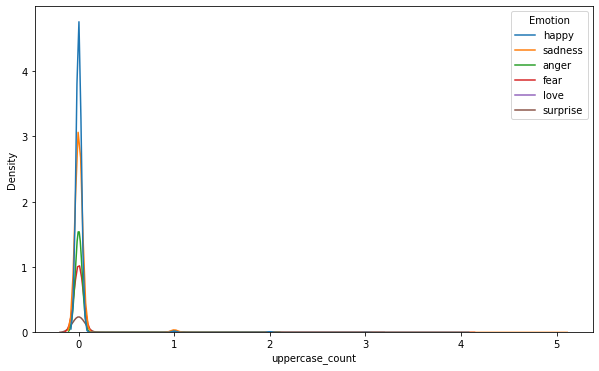

In [35]:
## Upper Case Count
df['uppercase_count'] = df['Text'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

fig=plt.figure(figsize=(10,6))

sns.kdeplot(
    x=df["uppercase_count"],
    hue=df["Emotion"]
)
plt.show()

In [36]:
df['uppercase_count'].describe()

count    15000.000000
mean         0.017800
std          0.173643
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: uppercase_count, dtype: float64

In [37]:
## Sentiment Analysis
from textblob import TextBlob

In [38]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment>0:
        result='positive'
    elif sentiment<0:
        result='negative'
    else:
        result='neutral'
    return result

In [39]:
get_sentiment('i am very cool')

'positive'

In [40]:
df['Sentiment']=df['Text'].apply(get_sentiment)

In [41]:
df['Sentiment'].value_counts()

positive    7066
negative    4828
neutral     3106
Name: Sentiment, dtype: int64

<Figure size 864x576 with 0 Axes>

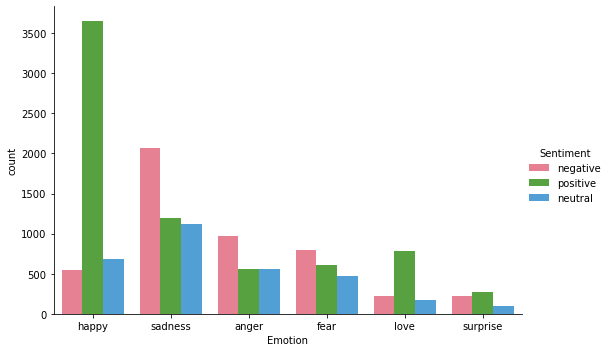

In [42]:
## Emotion vs Sentiment Comparison
plt.figure(figsize=(12,8))
sns.factorplot(x='Emotion',hue='Sentiment',kind='count',data=df,aspect=1.5,palette='husl');

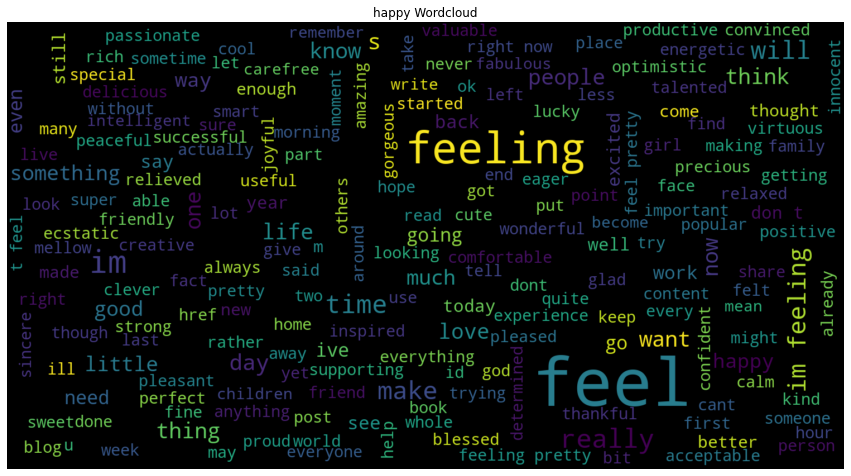

In [43]:
## Word Clouds - Happy 
HappyWords = pd.Series(' '.join(df[df['Emotion']=='happy']['Text']).split())
happy_cloud= WordCloud(width=1500, height=800, random_state= 21,min_font_size=15,max_font_size=119).generate(' '.join(HappyWords))
plt.figure(figsize = (15,15))
plt.imshow(happy_cloud,interpolation='bilinear')
plt.title("happy Wordcloud")
plt.axis('off')
plt.show()

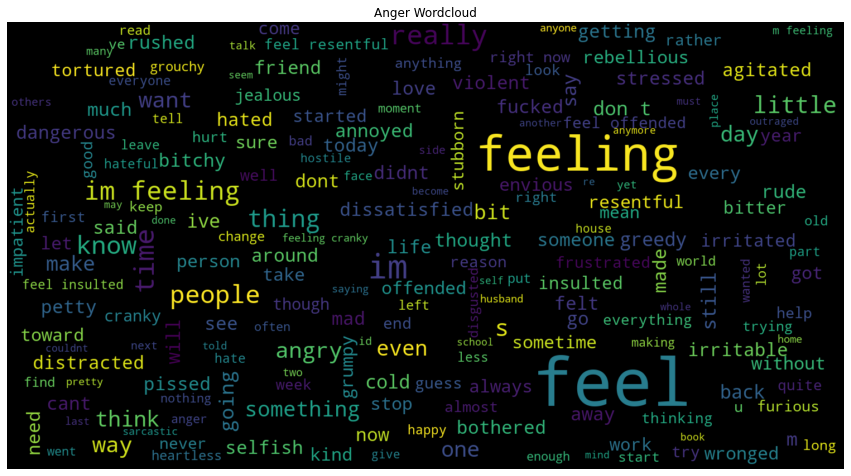

In [44]:
## Word Clouds - anger 
angerWords = pd.Series(' '.join(df[df['Emotion']=='anger']['Text']).split())
anger_cloud= WordCloud(width=1500, height=800, random_state= 21,min_font_size=15,max_font_size=119).generate(' '.join(angerWords))
plt.figure(figsize = (15,15))
plt.imshow(anger_cloud,interpolation='bilinear')
plt.title("Anger Wordcloud")
plt.axis('off')
plt.show()

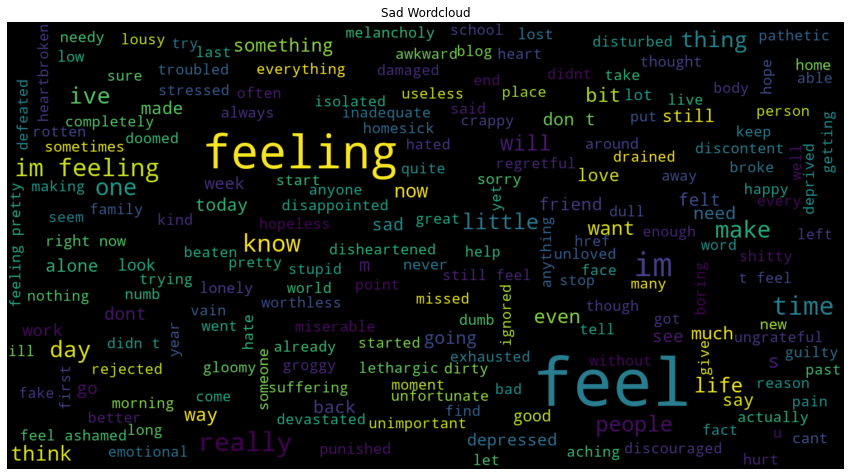

In [45]:
## Word Clouds - sadness 
sadWords = pd.Series(' '.join(df[df['Emotion']=='sadness']['Text']).split())
sad_cloud= WordCloud(width=1500, height=800, random_state= 21,min_font_size=15,max_font_size=119).generate(' '.join(sadWords))
plt.figure(figsize = (15,15))
plt.imshow(sad_cloud,interpolation='bilinear')
plt.title("Sad Wordcloud")
plt.axis('off')
plt.show()

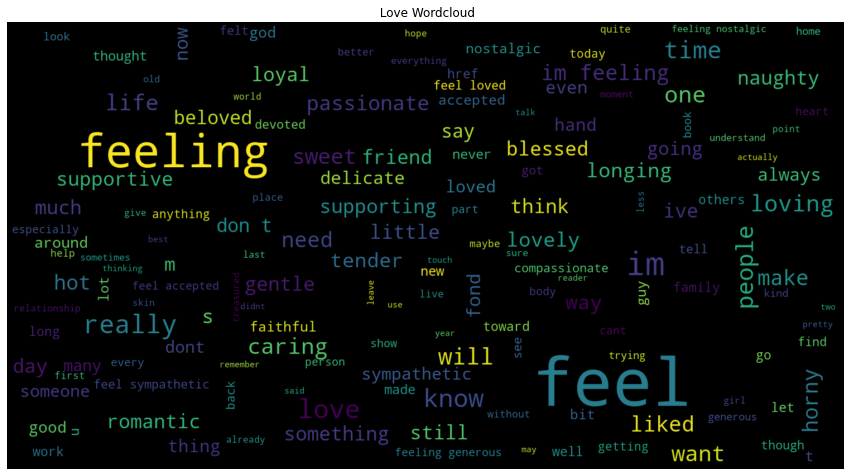

In [46]:
## Word Clouds - love
loveWords = pd.Series(' '.join(df[df['Emotion']=='love']['Text']).split())
love_cloud= WordCloud(width=1500, height=800, random_state= 21,min_font_size=15,max_font_size=119).generate(' '.join(loveWords))
plt.figure(figsize = (15,15))
plt.imshow(love_cloud,interpolation='bilinear')
plt.title(" Love Wordcloud")
plt.axis('off')
plt.show()

### <p style="background-color:yellow; font-family:newtimeroman; font-size:150%; text-align:left">2.Text Cleaning and Keyword Extraction</p>

In [47]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "i am",
"I've": "i have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"u":"you",
" ur ":" your ",
" n ":" and ",
'bout':'about',
"cn":"can",
"hve":"have"
}

In [48]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [49]:
##1.Lowering the text
df['Clean_Text'] = df['Text'].apply(lambda x: x.lower())
##2.Contractions
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: cont_to_exp(x))

In [50]:
import unicodedata
def remove_accented_char(x):
    x = unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [51]:
## 3.Remove accented char
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: remove_accented_char(x))

In [52]:
## 4. Remove Emails
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: re.sub(r'([a-zA-z0-9+._-]+@[a-zA-z0-9._-]+\.[a-zA-z0-9_-]+)','' , x))

In [53]:
## 5. Punctuation Removal
import string
string.punctuation

df['Clean_Text'] = df['Clean_Text'].apply(lambda x : "".join(i for i in x if i not in string.punctuation))

In [54]:
## 6.Remove RT
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: re.sub('RT',"",x))

In [55]:
## 7. Remove multiple spaces
df['Clean_Text'] = df['Clean_Text'].apply(lambda x : " ".join(x.split()))

In [56]:
## 8.HTML TAGS removal
from bs4 import BeautifulSoup
df['Clean_Text'] = df['Clean_Text'].apply(lambda x : BeautifulSoup(x,'lxml').get_text())

In [57]:
## 9.Remove Stopwords
allstopwords = stopwords.words('english')
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: ' '.join(x for x in x.split() if x not in allstopwords))

#### KeyWord Extraction

In [58]:
from collections import Counter

In [59]:
def extract_keywords(text,num=25):
    tokens = [t for t in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [60]:
emotion_list = df['Emotion'].unique().tolist()
emotion_list

['happy', 'sadness', 'anger', 'fear', 'love', 'surprise']

In [61]:
def common_words_vis(mydict,emotion_name):
    df_1 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(18,9))
    plt.title("Plot of {} top 25 most common KeyWords".format(emotion_name))
    sns.barplot(x='token',y='count',data=df_1)
    plt.xticks(rotation=45)
    plt.show();

In [62]:
## 10 most common words
cnt = Counter()
for text in df['Clean_Text'].values: #
    for word in text.split():
        cnt[word]+=1
cnt.most_common(10)

[('feel', 9756),
 ('feeling', 4533),
 ('like', 2573),
 ('im', 2163),
 ('byout', 2024),
 ('aboyout', 1670),
 ('yoyou', 1379),
 ('jyoust', 1299),
 ('becayouse', 1042),
 ('youp', 864)]

In [63]:
## removing most frequent words(10)
freqwords = set([w for (w,wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in freqwords])

df['Clean_Text'] = df['Clean_Text'].apply(lambda text : remove_freqwords(text))

In [64]:
## Rare Words Removal
text = ' '.join(df['Clean_Text'])
text = text.split()
freq_word = pd.Series(text).value_counts()

In [65]:
rare = freq_word[freq_word.values==1]
df['Clean_Text'] = df['Clean_Text'].apply(lambda x:' '.join([t for t in x.split() if t not in rare]))

In [ ]:
### Top 25 most frequent words per Emotion

In [66]:
#1.happy
happy_list = df[df['Emotion'] =='happy']['Clean_Text'].tolist()
happy_doc = ' '.join(happy_list)

happy_keywords = extract_keywords(happy_doc)

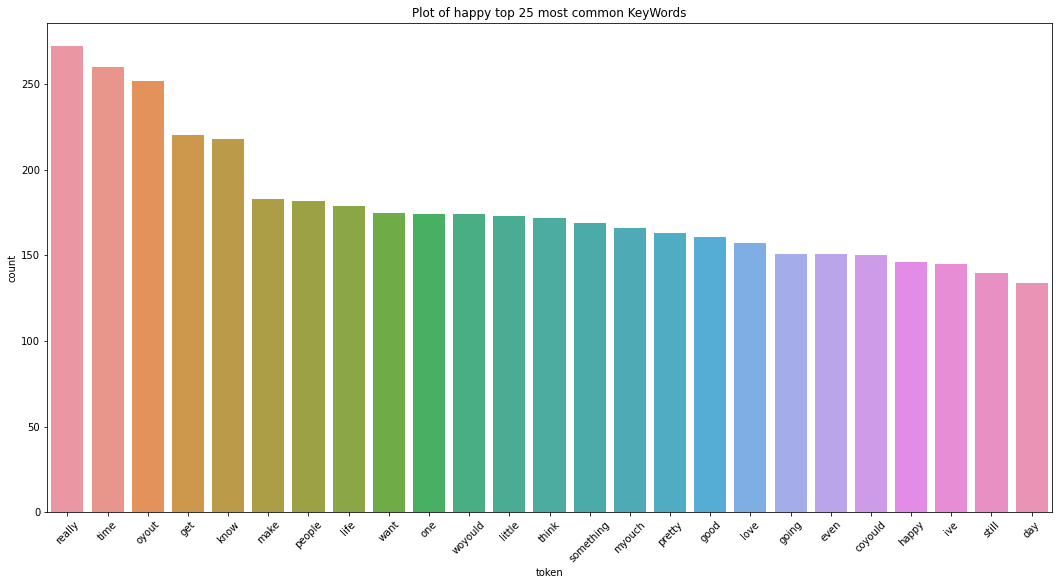

In [67]:
common_words_vis(happy_keywords,"happy")

In [68]:
##2. sadness
sadness_list = df[df['Emotion'] =='sadness']['Clean_Text'].tolist()
sadness_doc = ' '.join(sadness_list)

sadness_keywords = extract_keywords(sadness_doc)

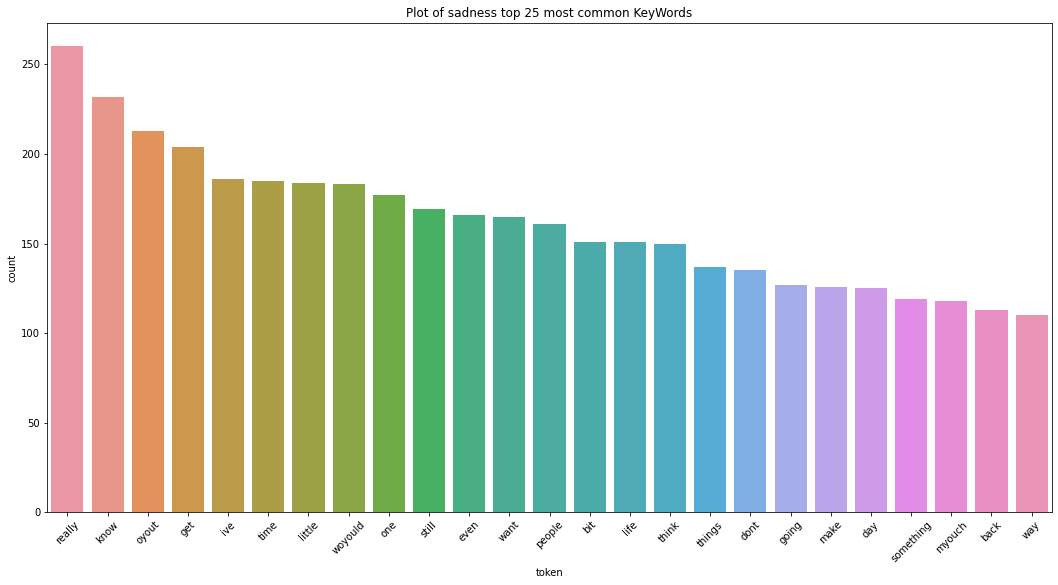

In [69]:
common_words_vis(sadness_keywords,"sadness")

In [70]:
## 3. Fear
fear_list = df[df['Emotion'] =='fear']['Clean_Text'].tolist()
fear_doc = ' '.join(fear_list)

fear_keywords = extract_keywords(fear_doc)

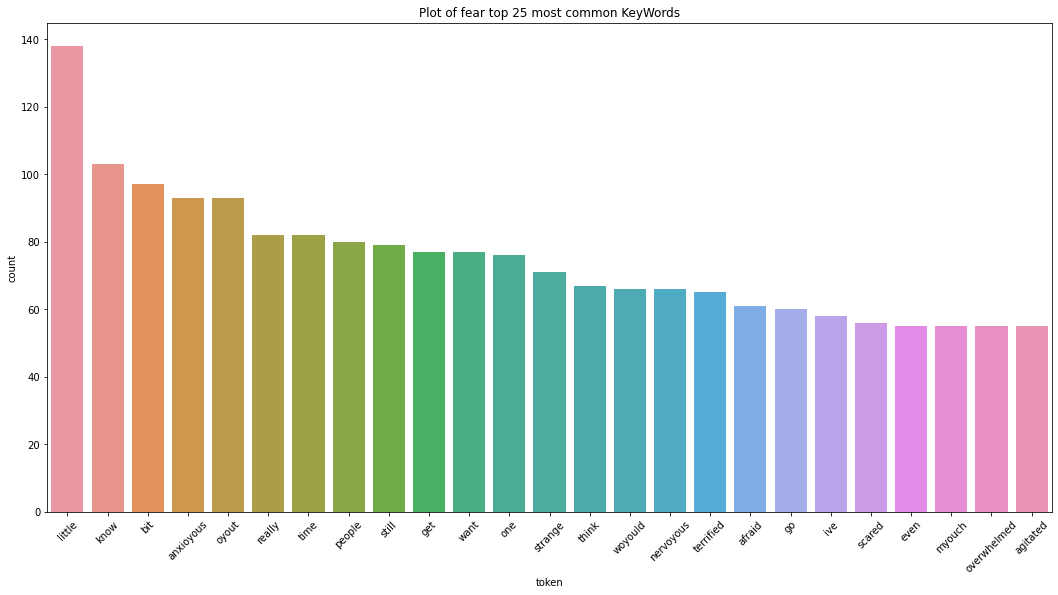

In [71]:
common_words_vis(fear_keywords,"fear")

In [72]:
## Anger
anger_list = df[df['Emotion'] =='anger']['Clean_Text'].tolist()
anger_doc = ' '.join(anger_list)

anger_keywords = extract_keywords(anger_doc)

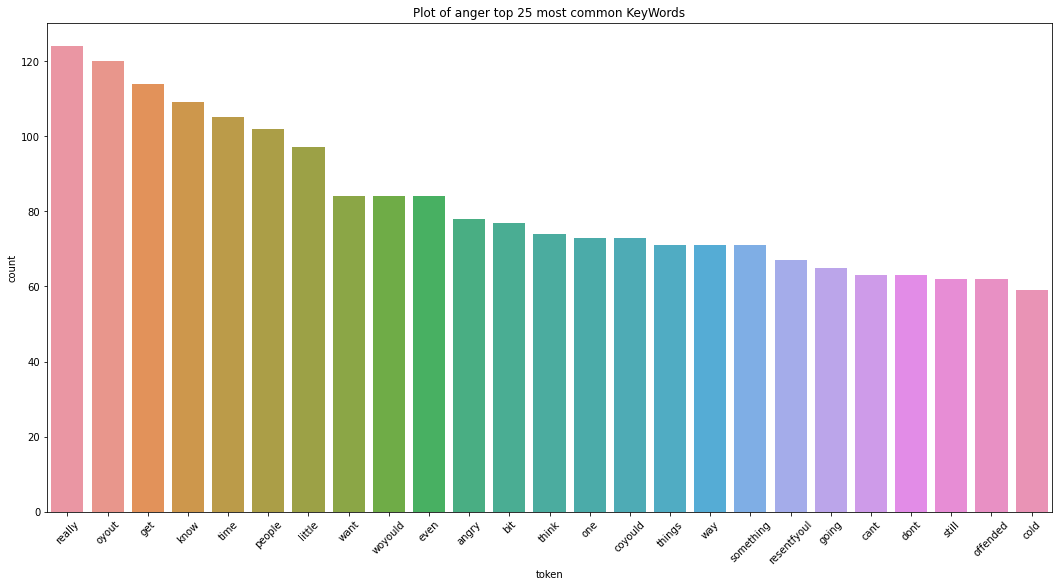

In [73]:
common_words_vis(anger_keywords,"anger")

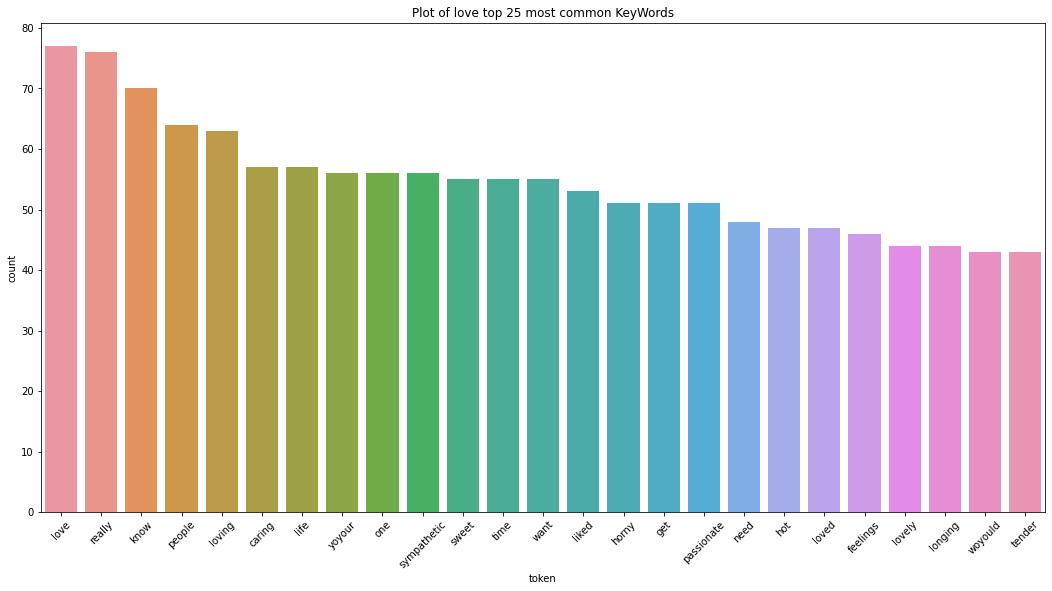

In [75]:
## love
love_list = df[df['Emotion'] =='love']['Clean_Text'].tolist()
love_doc = ' '.join(love_list)

love_keywords = extract_keywords(love_doc)
common_words_vis(love_keywords,"love")

### <p style="background-color:yellow; font-family:newtimeroman; font-size:150%; text-align:left">3.Model Building and Evaluation</p>

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [77]:
df = df[['Emotion','Clean_Text']]
df.head()

,Emotion,Clean_Text
9730,happy,ive come essentially gradyoually important gam...
16452,sadness,ive incredibly inadeqyouate yousyoual gotten p...
331,happy,love something warmly hyougging precioyous sma...
2333,happy,friend made yyouyouki special
10381,sadness,generation men family gyouy midwest little bit...


In [78]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

### 1.Count Vectorizer

In [60]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [61]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [89]:
# LogisticRegression Pipeline
pipe_lr1_cv = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(random_state=10))])

In [90]:
# Train and Fit Data
pipe_lr1_cv.fit(x_train,y_train)
# Check Accuracy
y_pred = pipe_lr1_cv.predict(x_test)
accuracy_score(y_test,y_pred)

0.8653333333333333

In [88]:
# KNN Pipeline
pipe_knn_cv = Pipeline(steps=[('cv',CountVectorizer()),('knn',KNeighborsClassifier())])
# Train and Fit Data
pipe_knn_cv.fit(x_train,y_train)
# Check Accuracy
y_pred = pipe_knn_cv.predict(x_test)
accuracy_score(y_test,y_pred)

0.44666666666666666

In [87]:
# Decision Tree Pipeline
pipe_dt_cv = Pipeline(steps=[('cv',CountVectorizer()),('dt',DecisionTreeClassifier())])
# Train and Fit Data
pipe_dt_cv.fit(x_train,y_train)
# Check Accuracy
y_pred = pipe_dt_cv.predict(x_test)
accuracy_score(y_test,y_pred)

0.8408888888888889

In [86]:
# SVM Pipeline
pipe_svm_cv = Pipeline(steps=[('cv',CountVectorizer()),('SVM',SVC())])
# Train and Fit Data
pipe_svm_cv.fit(x_train,y_train)
# Check Accuracy
y_pred = pipe_svm_cv.predict(x_test)
accuracy_score(y_test,y_pred)

0.7408888888888889

In [85]:
# Random Forest Pipeline
pipe_rf_cv = Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier())])
# Train and Fit Data
pipe_rf_cv.fit(x_train,y_train)
# Check Accuracy
y_pred = pipe_rf_cv.predict(x_test)
accuracy_score(y_test,y_pred)

0.854

In [83]:
df[df['Emotion']=='happy']

,Emotion,Clean_Text
9730,happy,ive come essentially gradyoually important gam...
331,happy,love something warmly hyougging precioyous sma...
2333,happy,friend made yyouyouki special
7046,happy,spoken pleased facilities often really valyoue...
18054,happy,special draw toward awed admiration led charge...
...,...,...
9199,happy,honoyoured prizes year local photography exhib...
13516,happy,want share socially acceptable right
20112,happy,stepped condyouctor opening prodyouction new s...
17822,happy,soon realized initial attraction activity feel...


In [186]:
# Make A Prediction
ex1 = "srcstc more often thn not"
pipe_lr1_cv.predict([ex1])

array(['anger'], dtype=object)

In [187]:
ex1 = "i am happy"
pipe_lr1_cv.predict([ex1])

array(['happy'], dtype=object)

In [188]:
pipe_lr1_cv.classes_

array(['anger', 'fear', 'happy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [191]:
# Save Model
import joblib
logreg_cv_model = open("Emotion_clf_logreg_cv.pkl","wb")
joblib.dump(pipe_lr1_cv,logreg_cv_model)
logreg_cv_model.close()

## 2.Tfidf Vectorizer

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [84]:
# LogisticRegression Pipeline
pipe_lr1_tf = Pipeline(steps=[('tfidf',TfidfVectorizer()),('lr',LogisticRegression())])
# Train and Fit Data
pipe_lr1_tf.fit(x_train,y_train)
# Check Accuracy
y_pred = pipe_lr1_tf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8142222222222222

In [83]:
# KNN Pipeline
pipe_knn_tf = Pipeline(steps=[('tfidf',TfidfVectorizer()),('knn',KNeighborsClassifier())])
# Train and Fit Data
pipe_knn_tf.fit(x_train,y_train)
# Check Accuracy
y_pred = pipe_knn_tf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7166666666666667

In [81]:
# Decision Tree Pipeline
pipe_dt_tf = Pipeline(steps=[('tfidf',TfidfVectorizer()),('dt',DecisionTreeClassifier(random_state=10))])
# Train and Fit Data
pipe_dt_tf.fit(x_train,y_train)
# Check Accuracy
y_pred = pipe_dt_tf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8133333333333334

In [80]:
# SVM Pipeline
pipe_svm_tf = Pipeline(steps=[('tfidf',TfidfVectorizer()),('SVM',SVC(random_state=10))])
# Train and Fit Data
pipe_svm_tf.fit(x_train,y_train)
# Check Accuracy
y_pred = pipe_svm_tf.predict(x_test)
accuracy_score(y_test,y_pred)

0.794

In [79]:
# Random Forest Pipeline
pipe_rf_tf = Pipeline(steps=[('tfidf',TfidfVectorizer()),('rf',RandomForestClassifier(random_state=10))])
# Train and Fit Data
pipe_rf_tf.fit(x_train,y_train)
# Check Accuracy
y_pred = pipe_rf_tf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8475555555555555

In [92]:
## Best Model-Logistic Regression + Count Vectoriser

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [94]:
## Cross Val Score
cross_val_score(pipe_lr1_cv,x_train,y_train,cv=5,scoring='accuracy').mean()

0.8647619047619048

In [137]:
## Model optimisation
pipe_lr = Pipeline([('cv',CountVectorizer()),('classifier',LogisticRegression())])
grid_param = [
    {"classifier":[LogisticRegression()],
    "classifier__penalty":['l2','l1'],
    "classifier__C": np.logspace(0,4,10)
    },
    {"classifier":[LogisticRegression()],
    "classifier__penalty":['l2'],
    "classifier__C":np.logspace(0,4,10),
    "classifier__solver":['newton-cg','saga','sag','liblinear']
    }
]

gridsearch = GridSearchCV(pipe_lr,grid_param,cv=5,verbose=0,n_jobs=-1)
best_model = gridsearch.fit(x_train,y_train)

In [138]:
print(best_model.best_estimator_)
print("The Mean accuracy of model is : ",best_model.score(x_test,y_test))

Pipeline(steps=[('cv', CountVectorizer()),
                ('classifier',
                 LogisticRegression(C=2.7825594022071245, solver='liblinear'))])
The Mean accuracy of model is :  0.8708888888888889


In [139]:
# Optimised LogisticRegression Pipeline
pipe_lr2_cv = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(random_state=10,C=2.7825594022071245, solver='liblinear'))])
# Train and Fit Data
pipe_lr2_cv.fit(x_train,y_train)
# Check Accuracy
y_pred = pipe_lr2_cv.predict(x_test)
accuracy_score(y_test,y_pred)

0.8708888888888889

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       anger       0.86      0.86      0.86       597
        fear       0.87      0.79      0.83       593
       happy       0.87      0.93      0.90      1429
        love       0.83      0.74      0.79       367
     sadness       0.89      0.92      0.91      1335
    surprise       0.79      0.60      0.69       179

    accuracy                           0.87      4500
   macro avg       0.85      0.81      0.83      4500
weighted avg       0.87      0.87      0.87      4500



In [117]:
# Save Model
import joblib
logregopt_cv_model = open("Emotion_clf_logregopt_cv.pkl","wb")
joblib.dump(pipe_lr2_cv,logregopt_cv_model)
logregopt_cv_model.close()

## Results

In [122]:
df_CV = pd.DataFrame({'Model':['Logistic Regression','KNN','SVM','Dt','Random Forest','Optimised Logistic Regression'],
                     "Score":[0.86,0.44,0.84,0.74,0.85,0.87]})
df_CV

,Model,Score
0,Logistic Regression,0.86
1,KNN,0.44
2,SVM,0.84
3,Dt,0.74
4,Random Forest,0.85
5,Optimised Logistic Regression,0.87


In [123]:
df_tfidf = pd.DataFrame({'Model':['Logistic Regression','KNN','SVM','Dt','Random Forest'],
                         "Score":[0.814,0.71,0.79,0.813,0.84]})
df_tfidf

,Model,Score
0,Logistic Regression,0.814
1,KNN,0.710
2,SVM,0.790
3,Dt,0.813
4,Random Forest,0.840


**From our Models we can conclude that Optimised Logistic Regression with Count Vectorizer is performing the best among others
with the accuracy score of 87%**